# Módulo II : Manipulación de datos en Python

### 1.1 Importar y visualizar datos en formato .xlsx

Para ganar expertiz en la visualización y manejo de datos 
supondremos que nos ha contratado una prestigiosa empresa 
de insumos y materiales de laboratorio. Nuestro jefe necesita 
que analicemos las ventas de este mes.

- Descargar en su computador el archivo [ventas.xlsx](https://docs.google.com/spreadsheets/d/1zIUpJ4yUHG2dTfPBxSJsijaNeVPyb1d_/edit?usp=drive_link&ouid=104642281055279644009&rtpof=true&sd=true)
- Importar archivo .xlsx al terminal de Jupyter notebook 

Para este tipo de archivos necesitamos utilizar la librería pandas:

In [53]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [54]:
# Cargar el archivo .xlxs en un DataFrame (df)
ventas=pd.read_excel("ventas.xlsx")
ventas

,Codigo,Nombre,Cantidad_Vendida,Total
0,01-025-5A,"MEM-E 10X Conc.,Earles Salts Base,500ml./01-02...",2,19000.00
1,01-03023,Pechera Plastica de PVC tamaño corta 75x70cm10/bs,2,1000.00
2,01-055-1A,"DMEM High Glucose, s/glut y s/ piruvato, 500m...",5,10300.00
3,01-100-1A,"RPMI medium 1640,fenol/c/L-glutamina,s/hepes 5...",3,34530.00
4,01-115-1A,"Leibovitz L-15, medio cultivo c/ L-glutamina 5...",8,134400.00
...,...,...,...,...
678,XB101120-0010-001,"Punta 0.1-10ul tipo gilson,blanca S/Nucle,1000...",91,509440.00
679,XB101220-1000-001,"Punta azul,100-1000ul, libre de Nucleasas 1000...",5,33840.00
680,XB101621-0200,"Punta Amarilla 0,1-200ul,esteril,biselada, DNA...",6,12940.50
681,XB111121-0010,"Punta 0.1-10ul Tipo Gilson,blanca,s/Nuclea,EST...",3,4800.00


In [4]:
#Por ejemplo, si necesitamos ver solo la primera fila podemos utilizar: 
ventas[0:1]

,Codigo,Nombre,Cantidad_Vendida,Total
0,01-025-5A,"MEM-E 10X Conc.,Earles Salts Base,500ml./01-02...",2,19000.0


In [5]:
#Otra forma de visualizar la primera fila podría ser:
ventas.iloc[0]

Codigo                                                      01-025-5A
Nombre              MEM-E 10X Conc.,Earles Salts Base,500ml./01-02...
Cantidad_Vendida                                                    2
Total                                                         19000.0
Name: 0, dtype: object

In [6]:
#Si necesitamos ver solo la primera columna, necesitamos hacer un pequeño cambio al código anterior: 
ventas.iloc[:,0]

0              01-025-5A
1               01-03023
2              01-055-1A
3              01-100-1A
4              01-115-1A
             ...        
678    XB101120-0010-001
679    XB101220-1000-001
680        XB101621-0200
681        XB111121-0010
682        XB111221-1000
Name: Codigo, Length: 683, dtype: object

#### 1.2 Manipulación de datos númericos en archivos .xlsx
¿Cómo podríamos saber la suma total de las ventas percibidas en el mes?

##### 1.2.1 Sumatoria total - Función .sum()

In [7]:
#Para realizar ese calculo primero debemos identificar la columna "Total"
ventas["Total"]

0       19000.00
1        1000.00
2       10300.00
3       34530.00
4      134400.00
         ...    
678    509440.00
679     33840.00
680     12940.50
681      4800.00
682     90678.12
Name: Total, Length: 683, dtype: float64

In [8]:
#Otra forma de identificar esta columna podría ser mediante:
ventas.iloc[:,3]

0       19000.00
1        1000.00
2       10300.00
3       34530.00
4      134400.00
         ...    
678    509440.00
679     33840.00
680     12940.50
681      4800.00
682     90678.12
Name: Total, Length: 683, dtype: float64

In [9]:
#Como ya tenemos identificada la columna ahora solo nos queda realizar la sumatoria.
#Esto lo realizamos mediante la función "sum.()"
sumatoria=ventas["Total"].sum()

print("La suma total de ventas del mes de septiembre fue:",sumatoria)


La suma total de ventas del mes de septiembre fue: 137150509.6169


##### 1.2.2 Valor mayor - Función .max() 

Otra pregunta interesante sería: ¿Cual es el artículo que tuvo mayor cantidad de ventas?


In [10]:
#identificamos la columna que deseamos obtener este dato, en este caso es la columna 3
#considerando que Python toma valores desde el "0" sería la columna "2"
ventas.iloc[:,2]

0       2
1       2
2       5
3       3
4       8
       ..
678    91
679     5
680     6
681     3
682    36
Name: Cantidad_Vendida, Length: 683, dtype: int64

In [11]:
#Luego para saber el valor mas alto de esta columna aplicamos 
#La función max()
ventas.iloc[:,2].max()

10010

In [12]:
#O también:
ventas["Cantidad_Vendida"].max()

10010

In [13]:
#Ya tenemos el el número mas alto, sin embargo nos falta saber el nombre del artículo
#Para saber el nombre podríamos aplicar la función .idxmax()
insumo_mas_vendido=ventas.loc[ventas["Cantidad_Vendida"].idxmax(),"Nombre"]
cantidad_max_vendida=ventas.iloc[:,2].max()

print("El insumo más vendido es:",insumo_mas_vendido)
print("Cantidad vendida:",cantidad_max_vendida)


El insumo más vendido es: Asa calibrada de 1ul, Blanca, esteril - EDLAB
Cantidad vendida: 10010


#### 1.3 Graficar los datos

Ahora nuestro jefe nos pide un grafico de torta que contenga los 10 artículos más vendidos.
Esto podemos realizarlo con la función .nlargest de la librería Pandas:

##### 1.3.1 Top 10 - Función .nlargest()

In [55]:
#Debemos aplicar la función .nlargest al df "ventas", seguido de la cantidad de elementos que necesitemos.
#(en este caso son 10). Luego debemos específicar la columna en la cual buscaremos los valores más altos. 
ventas.nlargest(10, 'Cantidad_Vendida')


,Codigo,Nombre,Cantidad_Vendida,Total
255,BY1008K1021,"Asa calibrada de 1ul, Blanca, esteril - EDLAB",10010,390400.0
256,BY10097105,"Portaobjeto 26x76 mm,con 1 franja,bordes esmer...",3100,1595126.4
301,BY1062P1001-S,"Especulo pequeño, esteril, individual, desechable",1140,570000.0
303,BY10657101,"Portaobjeto 26x76mm,sin franja(liso),bordes es...",1080,460260.0
105,65-1001,Asa tipo Drigalski esteril individual (forma L),1030,48797.2
289,BY1050CUBRE18X18YC,"Cubre objeto 18x18mm 100/Caja, EDLAB.",1005,201100.0
455,HS1006GRL333,Gel Refrigerante 300gr. 21x21cm,1000,340000.0
254,BY1007K1020,"Asa calibrada de 10ul, azul, esteril. EDLAB",820,32689.6
265,BY1021YCMO11,"Hoja de bisturi # 11,esteril, 100/Caja.",685,1980087.2
292,BY1052CUBRE22X22YC,Cubre objeto 22x22mm 100/Caja. EDLAB.,570,146800.0


In [15]:
#Para crear el gráfico lo podemos definir en la variable "top_10":
top_10 = ventas.nlargest(10, 'Cantidad_Vendida')

# Mostrar los resultados
print(top_10)

                 Codigo                                             Nombre  \
255         BY1008K1021      Asa calibrada de 1ul, Blanca, esteril - EDLAB   
256          BY10097105  Portaobjeto 26x76 mm,con 1 franja,bordes esmer...   
301       BY1062P1001-S  Especulo pequeño, esteril, individual, desechable   
303          BY10657101  Portaobjeto 26x76mm,sin franja(liso),bordes es...   
105             65-1001    Asa tipo Drigalski esteril individual (forma L)   
289  BY1050CUBRE18X18YC              Cubre objeto 18x18mm 100/Caja, EDLAB.   
455        HS1006GRL333                    Gel Refrigerante 300gr. 21x21cm   
254         BY1007K1020        Asa calibrada de 10ul, azul, esteril. EDLAB   
265        BY1021YCMO11            Hoja de bisturi # 11,esteril, 100/Caja.   
292  BY1052CUBRE22X22YC             Cubre objeto 22x22mm 100/Caja. EDLAB.    

     Cantidad_Vendida      Total  
255             10010   390400.0  
256              3100  1595126.4  
301              1140   570000.0  
3

##### 1.3.2 Gráfico de torta - Función plt.pie()

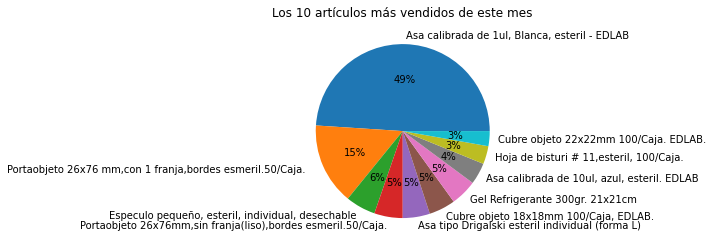

In [57]:
# Crear el gráfico de torta
#Utilizando la función .pie de la librería matplotlib.pyplot,
#debemos especificar en primer lugar los valores que queremos graficar en este caso la cantidad mas vendida
#luego se especifican las etiquetas, nosotros deseamos que se muestren los nombres de los insumos mas vendidos
#Finalmente si queremos ver los porcentajes se agrega autopct='%1.0f%%' 
plt.pie(top_10["Cantidad_Vendida"], labels=top_10["Nombre"],autopct='%1.0f%%')

# Añadir título
plt.title('Los 10 artículos más vendidos de este mes')

# Mostrar el gráfico de torta
plt.show()

##### 1.3.3 Gráfico de barras - Función plt.bar()
¿Cómo podríamos graficar lo mismo pero en graficos de barras?

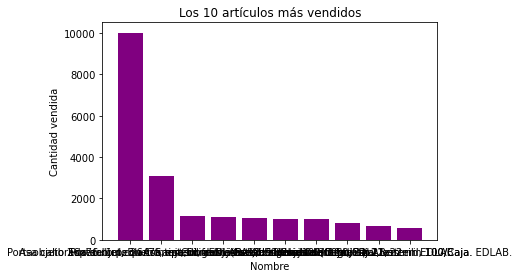

In [58]:
# Crear el gráfico de barras
#plt.bar toma como argumento eje "x", eje "y" además podemos agregar diferentes colores.
plt.bar(top_10["Nombre"], top_10["Cantidad_Vendida"], color='purple')

# Añadir título y etiquetas
plt.title('Los 10 artículos más vendidos')
plt.xlabel('Nombre')
plt.ylabel('Cantidad vendida')

# Mostrar el gráfico
plt.show()

De este modo vemos que al ser tan largos los nombres se solapan, sin embargo se puede realizar el siguiente arreglo:


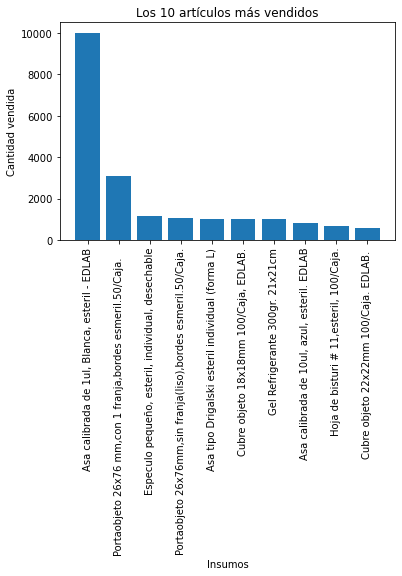

In [18]:
# Crear el gráfico de barras
plt.bar(top_10["Nombre"], top_10["Cantidad_Vendida"]) #si no agregamos color lo realiza azul por defecto

# Añadir título y etiquetas
plt.title('Los 10 artículos más vendidos')
plt.xlabel('Insumos')
plt.ylabel('Cantidad vendida')

# Rotar los nombres del eje x
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


### Ejercicios:
- Utilizando las funciones .idxmin() y .min() averigua el código del artículo menos vendido.
- Utilizando la función .nsmallest averigua los 10 artículos con menos ventas.

<img src="https://raw.githubusercontent.com/Barbara-GD/Introduccion_a_la_Bioinformatica/main/pythonASCII.png" alt="Drawing" style="width: 700px;"/>



In [19]:
#solución1:
insumo_menos_vendido=ventas.loc[ventas["Cantidad_Vendida"].idxmin(),"Codigo"]
cantidad_min_vendida=ventas.iloc[:,2].min()

print("El código del insumo menos vendido es:",insumo_menos_vendido)
print("Cantidad vendida:",cantidad_min_vendida)


El código del insumo menos vendido es: GE1000N10PC
Cantidad vendida: 0


In [20]:
#solución2:
ventas.nsmallest(10, 'Cantidad_Vendida')

,Codigo,Nombre,Cantidad_Vendida,Total
441,GE1000N10PC,"Caja para raton, policarbonato, autoclavable, ...",0,0.0
22,18000-00,Small Vessel Cauterizer Kit./18000-00,1,588200.0
23,18000-01,Straight Fine Tip for Small Vessel Cauterizer....,1,94620.0
28,215710,"ADONITOL, 10gr./215710",1,43000.0
29,215910,"L- arabinose, 25gr./215910",1,62247.0
31,217510,"RHAMNOSE ,25gr-217510",1,55771.0
32,217610,"SACCHAROSE, 500GR./217610",1,18456.0
33,217910,"D-Sorbitol ,500g, 217910",1,49599.0
34,218081,"REINFORCED CLOSTRIDIAL MEDIUM, 500gr./218081",1,77129.0
36,221169,Chocolate II agar c/ hem/IsoVitaleX - 20 placa...,1,10600.0


### 2.1 Importar y visualizar datos en formato .gz

Un archivo GZ es un archivo comprimido que se crea utilizando el algoritmo de compresión estándar gzip (GNU zip). Puede contener múltiples archivos comprimidos, directorios y apéndices de archivos. Este formato se desarrolló inicialmente para reemplazar los formatos de compresión en los sistemas UNIX.

- Abrir base de datos [Gene Expression Omnibus](https://www.ncbi.nlm.nih.gov/geo/) 
- Buscar el GEO accession: GSE52339
- Descargar en su computador el archivo "GSE52339_RNAseq_genes.fpkm_tracking.gz”
- Importar archivo .gz al terminal de Jupyter notebook 


In [21]:
# Cargar el archivo .gz en un DataFrame
df = pd.read_csv("GSE52339_RNAseq_genes.fpkm_tracking",sep='\t')
df

,tracking_id,class_code,nearest_ref_id,gene_id,gene_short_name,tss_id,locus,length,coverage,T1_FPKM,...,T14_conf_hi,T14_status,T15_FPKM,T15_conf_lo,T15_conf_hi,T15_status,T16_FPKM,T16_conf_lo,T16_conf_hi,T16_status
0,15S_rRNA,-,-,15S_rRNA,15S_RRNA,TSS2188,Mito:6545-8194,-,-,0.00000,...,0.00000,OK,0.00000,0.000000,0.00000,OK,0.00000,0.000000,0.00000,OK
1,21S_rRNA,-,-,21S_rRNA,21S_RRNA,TSS3982,Mito:58008-62447,-,-,0.00000,...,0.00000,OK,0.00000,0.000000,0.00000,OK,0.00000,0.000000,0.00000,OK
2,HRA1,-,-,HRA1,HRA1,TSS6151,I:94687-99869,-,-,9.27966,...,63.94530,OK,6.67206,0.000000,56.79900,OK,7.09043,0.000000,58.20380,OK
3,ICR1,-,-,ICR1,ICR1,TSS5516,IX:393880-397079,-,-,5.15379,...,8.48926,OK,4.17099,0.322224,8.01976,OK,4.31933,0.053414,8.58525,OK
4,LSR1,-,-,LSR1,LSR1,TSS3946,II:680682-681857,-,-,38.93320,...,68.17550,OK,32.23570,6.328300,58.14310,OK,39.49620,7.499780,71.49260,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7125,tY(GUA)J2,-,-,tY(GUA)J2,SUP4,TSS122,X:542947-543036,-,-,0.00000,...,0.00000,OK,0.00000,0.000000,0.00000,OK,0.00000,0.000000,0.00000,OK
7126,tY(GUA)M1,-,-,tY(GUA)M1,SUP5,TSS3785,XIII:168794-168883,-,-,0.00000,...,0.00000,OK,0.00000,0.000000,0.00000,OK,0.00000,0.000000,0.00000,OK
7127,tY(GUA)M2,-,-,tY(GUA)M2,SUP8,TSS38,XIII:837926-838015,-,-,0.00000,...,0.00000,OK,0.00000,0.000000,0.00000,OK,0.00000,0.000000,0.00000,OK
7128,tY(GUA)O,-,-,tY(GUA)O,SUP3,TSS5362,XV:288192-288281,-,-,0.00000,...,0.00000,OK,0.00000,0.000000,0.00000,OK,0.00000,0.000000,0.00000,OK


In [22]:
#Otra forma de saber las dimensiones de un df es mediante la función .shape
#Donde el primer valor corresponde a las filas y el segundo a las columnas
df.shape

(7130, 73)

In [23]:
# Visualizar las primeras 5 filas de datos
print(df.head())

  tracking_id class_code nearest_ref_id   gene_id gene_short_name   tss_id  \
0    15S_rRNA          -              -  15S_rRNA        15S_RRNA  TSS2188   
1    21S_rRNA          -              -  21S_rRNA        21S_RRNA  TSS3982   
2        HRA1          -              -      HRA1            HRA1  TSS6151   
3        ICR1          -              -      ICR1            ICR1  TSS5516   
4        LSR1          -              -      LSR1            LSR1  TSS3946   

              locus length coverage   T1_FPKM  ...  T14_conf_hi  T14_status  \
0    Mito:6545-8194      -        -   0.00000  ...      0.00000          OK   
1  Mito:58008-62447      -        -   0.00000  ...      0.00000          OK   
2     I:94687-99869      -        -   9.27966  ...     63.94530          OK   
3  IX:393880-397079      -        -   5.15379  ...      8.48926          OK   
4  II:680682-681857      -        -  38.93320  ...     68.17550          OK   

   T15_FPKM  T15_conf_lo  T15_conf_hi  T15_status  T16_F

In [24]:
# Visualizar las últimas 5 filas de datos
print(df.tail())

     tracking_id class_code nearest_ref_id    gene_id gene_short_name  \
7125   tY(GUA)J2          -              -  tY(GUA)J2            SUP4   
7126   tY(GUA)M1          -              -  tY(GUA)M1            SUP5   
7127   tY(GUA)M2          -              -  tY(GUA)M2            SUP8   
7128    tY(GUA)O          -              -   tY(GUA)O            SUP3   
7129    tY(GUA)Q          -              -   tY(GUA)Q        tY(GUA)Q   

       tss_id               locus length coverage  T1_FPKM  ...  T14_conf_hi  \
7125   TSS122     X:542947-543036      -        -      0.0  ...          0.0   
7126  TSS3785  XIII:168794-168883      -        -      0.0  ...          0.0   
7127    TSS38  XIII:837926-838015      -        -      0.0  ...          0.0   
7128  TSS5362    XV:288192-288281      -        -      0.0  ...          0.0   
7129  TSS1302    Mito:70823-70907      -        -      0.0  ...          0.0   

      T14_status T15_FPKM  T15_conf_lo  T15_conf_hi  T15_status T16_FPKM  \
7125

### 2.2 Manipulación de datos 
Muchas veces en bioinformatica se necesitan analizar genes y su respectiva expresión genética.
Cuando descargamos archivos RNA-seq o simirales, contiene información que no necesitamos, por lo tanto
debemos tratar los datos.

##### 2.2.1 Extraer infomación relevante 

In [25]:
#Ordenar df y sacar la información que no utilizaremos
# Seleccionar solo las columnas 'gene_id' 'T1_FPKM' 'T2_FPKM' 'T3_FPKM'
df_sort = df[['gene_id', 'T1_FPKM','T2_FPKM','T3_FPKM']]

# Mostrar el nuevo DataFrame resultante
df_sort

,gene_id,T1_FPKM,T2_FPKM,T3_FPKM
0,15S_rRNA,0.00000,0.00000,0.0000
1,21S_rRNA,0.00000,0.00000,0.0000
2,HRA1,9.27966,10.92260,12.5226
3,ICR1,5.15379,5.71864,5.1752
4,LSR1,38.93320,28.08680,33.9197
...,...,...,...,...
7125,tY(GUA)J2,0.00000,0.00000,0.0000
7126,tY(GUA)M1,0.00000,0.00000,0.0000
7127,tY(GUA)M2,0.00000,0.00000,0.0000
7128,tY(GUA)O,0.00000,0.00000,0.0000


##### 2.2.2  Crear nuevas columnas 

In [41]:
#¿Como podría sacar el promedio de cada fila y almacenarlo en una cuarta columna?
df_sort["Promedio"]=(df_sort["T1_FPKM"]+df_sort["T2_FPKM"]+df_sort["T3_FPKM"])/3
df_sort

C:\Users\Aki\AppData\Local\Temp/ipykernel_17692/4140257677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sort["Promedio"]=(df_sort["T1_FPKM"]+df_sort["T2_FPKM"]+df_sort["T3_FPKM"])/3


,gene_id,T1_FPKM,T2_FPKM,T3_FPKM,Promedio,Promedio2
0,15S_rRNA,0.00000,0.00000,0.0000,0.000000,0.000000
1,21S_rRNA,0.00000,0.00000,0.0000,0.000000,0.000000
2,HRA1,9.27966,10.92260,12.5226,10.908287,10.908287
3,ICR1,5.15379,5.71864,5.1752,5.349210,NaN
4,LSR1,38.93320,28.08680,33.9197,33.646567,NaN
...,...,...,...,...,...,...
7125,tY(GUA)J2,0.00000,0.00000,0.0000,0.000000,NaN
7126,tY(GUA)M1,0.00000,0.00000,0.0000,0.000000,NaN
7127,tY(GUA)M2,0.00000,0.00000,0.0000,0.000000,NaN
7128,tY(GUA)O,0.00000,0.00000,0.0000,0.000000,NaN


In [46]:
#Otra forma sería:
#¿Como podría sacar el promedio de cada fila y almacenarlo en una cuarta columna?
df_sort["Promedio_numpy"]=df_sort[["T1_FPKM","T2_FPKM","T3_FPKM"]].mean(axis=1)
df_sort

C:\Users\Aki\AppData\Local\Temp/ipykernel_17692/2578243661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sort["Promedio_numpy"]=df_sort[["T1_FPKM","T2_FPKM","T3_FPKM"]].mean(axis=1)


,gene_id,T1_FPKM,T2_FPKM,T3_FPKM,Promedio,Promedio2,Promedio_numpy
0,15S_rRNA,0.00000,0.00000,0.0000,0.000000,0.000000,0.000000
1,21S_rRNA,0.00000,0.00000,0.0000,0.000000,0.000000,0.000000
2,HRA1,9.27966,10.92260,12.5226,10.908287,10.908287,10.908287
3,ICR1,5.15379,5.71864,5.1752,5.349210,NaN,5.349210
4,LSR1,38.93320,28.08680,33.9197,33.646567,NaN,33.646567
...,...,...,...,...,...,...,...
7125,tY(GUA)J2,0.00000,0.00000,0.0000,0.000000,NaN,0.000000
7126,tY(GUA)M1,0.00000,0.00000,0.0000,0.000000,NaN,0.000000
7127,tY(GUA)M2,0.00000,0.00000,0.0000,0.000000,NaN,0.000000
7128,tY(GUA)O,0.00000,0.00000,0.0000,0.000000,NaN,0.000000


In [26]:
#¿Como podría saber la media de la columna 4?
media= np.mean(df_sort["T3_FPKM"])
media

275.61714778218703

#### 2.2.3 Eliminar columnas

In [47]:
df_sort.drop("Promedio_numpy", axis=1 , inplace=True)
print(df_sort)

        gene_id   T1_FPKM   T2_FPKM  T3_FPKM   Promedio  Promedio2
0      15S_rRNA   0.00000   0.00000   0.0000   0.000000   0.000000
1      21S_rRNA   0.00000   0.00000   0.0000   0.000000   0.000000
2          HRA1   9.27966  10.92260  12.5226  10.908287  10.908287
3          ICR1   5.15379   5.71864   5.1752   5.349210        NaN
4          LSR1  38.93320  28.08680  33.9197  33.646567        NaN
...         ...       ...       ...      ...        ...        ...
7125  tY(GUA)J2   0.00000   0.00000   0.0000   0.000000        NaN
7126  tY(GUA)M1   0.00000   0.00000   0.0000   0.000000        NaN
7127  tY(GUA)M2   0.00000   0.00000   0.0000   0.000000        NaN
7128   tY(GUA)O   0.00000   0.00000   0.0000   0.000000        NaN
7129   tY(GUA)Q   0.00000   0.00000   0.0000   0.000000        NaN

[7130 rows x 6 columns]


D:\Programas\UNIVERSIDAD\Anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Ejercicio

- Graficar en barras los T1_FPKM, T2_FPKM y T3_FPKM del gen LSR1 siguiendo las siguientes instrucciónes:
- Utilizar plt.bar()
- Color de las barras deben ser rojas
- Las leyendas deben decir: 
  - Titulo: Fpkm gen LSR1
  - Eje X: Tiempo (h)
  - Eje Y: Enriquecimiento de la Expresión genética
  
  
Pistas: 
- Sabiendo los valores de cada fpkm puedes definir las variables como listas y construir los ejes x, y
- Recuerda que los nombres siempre van entre comillas
- Recuerda que plt.bar() tiene 3 argumentos básicos: (eje x, eje y, color)
 

<img src="https://raw.githubusercontent.com/Barbara-GD/Introduccion_a_la_Bioinformatica/main/pythonASCII.png" alt="Drawing" style="width: 700px;"/>


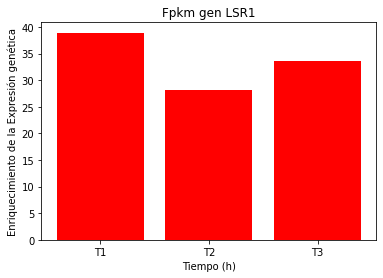

In [95]:
#Solución
#1. Identificar la fila en donde esta
df_sort.iloc[4]

#Definir variables
fpkm=[38.9332,28.0868,33.646567]
label=["T1","T2","T3"]

#Construir el grafico (x,y,color) Nota: Existen mas argumentos solo estamos trbajando con los básicos
plt.bar(label,fpkm, color="red")

# Añadir título y etiquetas
plt.title('Fpkm gen LSR1') #Titulo
plt.xlabel('Tiempo (h)') #eje x
plt.ylabel('Enriquecimiento de la Expresión genética') #"eje y"

plt.show() #mostror gráfico


#### 2.3 Exportar datos

Como incluímos una nueva columna a nuestros datos originales seguramente necesitaremos guardalos para analizarlos más adelante o visualizarlos en otro programa. Esto se realiza de la siguiente manera:

In [99]:
#Exportar los datos en formato .csv
df_sort.to_csv("T1-T3_fpkm.csv")

### 3.1 Visualización de archivos .fasta

#### Analizando secuencia de Orquidea Lady Slipper


<img src="https://raw.githubusercontent.com/Barbara-GD/Introduccion_a_la_Bioinformatica/main/orquidea_Lady_slipper.png" alt="Drawing" style="width: 300px;"/>

#### Abrir archivo FASTA: https://raw.githubusercontent.com/biopython/biopython/master/Doc/examples/ls_orchid.fasta
y guardarlo en la carpeta donde estamos trabajando actualmente.


In [50]:
df2 = pd.read_csv("ls_orchid.fasta.txt")
df2


,>gi|2765658|emb|Z78533.1|CIZ78533 C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
0,CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGA...
1,AATCCGGAGGACCGGTGTACTCAGCTCACCGGGGGCATTGCTCCCG...
2,CCGCCTCGGGAGCGTCCATGGCGGGTTTGAACCTCTAGCCCGGCGC...
3,AGCATCACCGGCGAATGGCATTGTCTTCCCCAAAACCCGGAGCGGC...
4,ATTTTGATGACTCTCGCAAACGGGAATCTTGGCTCTTTGCATCGGA...
...,...
1097,CGCAGCGAAATGCGATAATGGTGTGAATTGCAGAATCCCGTGAACA...
1098,CCCGAGGCCATCAGGCCAAGGGCACGCCTGCCTGGGCATTGCGAGT...
1099,TCCATACATACTGTTCAGCCGGTGCGGATGTGAGTTTGGCCCCTTG...
1100,GCTGCATGGGCTTTGGATGGTCCTAAATACGGAAAGAGGTGGACGA...


Documentation: https://pandas.pydata.org/docs/index.html